In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 14.84 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
data_dir = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign'

In [ ]:
import os
file_names = [data_dir + file_name for file_name in os.listdir(data_dir)]
file_names

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signtest.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signdev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signtrain.txt']

In [ ]:
def get_lines(filename):
  with open(filename, 'r') as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir + '/train.txt')
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

In [ ]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename)   # get all lines from filename
  abstract_lines = ""                 # create an empty abstract
  abstract_samples = []               # create an empty list of abstracts

  # Loop through each line in target file
  for line in input_lines:
    if line.startswith('###'):        # Check to see if line is an ID line
      abstract_id = line
      abstract_lines = ""               # reset abstraact string

    elif line.isspace():                # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines()       # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}                  # create empty dict to store data from line
        target_text_split = abstract_line.split("\t")         # split target label from text
        line_data["target"] = target_text_split[0]            # get target label
        line_data['text'] = target_text_split[1].lower()      # get target text and lower it
        line_data['line_number'] = abstract_line_number       #what number line does the line appear
        line_data['total_lines'] = len(abstract_line_split) - 1     #how many total lines are in the
        abstract_samples.append(line_data)                    # add line data to abstract samples list

    else:           #if the above conditions aren`t filfilled ,the line contains a labelled sentence
      abstract_lines += line

  return abstract_samples

In [ ]:
train_samples = preprocess_text_with_line_numbers(data_dir + '/train.txt')
val_samples = preprocess_text_with_line_numbers(data_dir + '/dev.txt')
test_samples = preprocess_text_with_line_numbers(data_dir + '/test.txt')

print(len(train_samples))

180040


In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [ ]:
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
train_df['target'].value_counts()

,count
target,
METHODS,59353
RESULTS,57953
CONCLUSIONS,27168
BACKGROUND,21727
OBJECTIVE,13839


<Axes: ylabel='Frequency'>

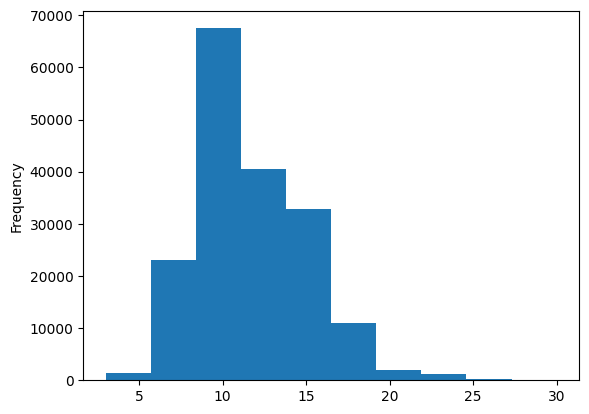

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
train_sentences = train_df.text.to_list()
test_sentences = test_df.text.to_list()
val_sentences = val_df.text.to_list()

In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df.target.to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_df.target.to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_df.target.to_numpy().reshape(-1,1))


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_labes_encoded = label_encoder.fit_transform(train_df.target.to_numpy())
val_labes_encoded = label_encoder.fit_transform(val_df.target.to_numpy())
test_labes_encoded = label_encoder.fit_transform(test_df.target.to_numpy())

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('Tf-idf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0.fit(
    X = train_sentences,
    y = train_labes_encoded
)

Pipeline(steps=[('Tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(X = val_sentences,
              y = val_labes_encoded)

0.7218323844829869

In [ ]:
baseline_preds = model_0.predict(val_sentences)

In [ ]:
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py

--2025-05-08 06:56:37--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-05-08 06:56:40 (26.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

baseline_results = calculate_results(y_true = val_labes_encoded,
                                     y_pred = baseline_preds)

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers

In [ ]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

np.float64(26.338269273494777)

(array([1.25846e+05, 4.78220e+04, 5.37600e+03, 7.86000e+02, 1.46000e+02,
        3.20000e+01, 1.90000e+01, 8.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([  1. ,  30.5,  60. ,  89.5, 119. , 148.5, 178. , 207.5, 237. ,
        266.5, 296. ]),
 <BarContainer object of 10 artists>)

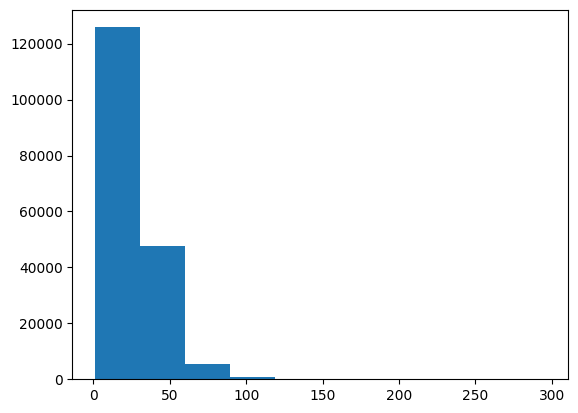

In [ ]:
import matplotlib.pyplot as plt

plt.hist(sent_lens, bins = 10)

In [ ]:
output_seq_len = int(np.percentile(sent_lens, 95))        # ilk 95 faiz data 55 soe qederdi
output_seq_len

55

In [ ]:
max_tokens = 68000

text_vectorizer = tf.keras.layers.TextVectorization(max_tokens = max_tokens,
                                                    output_sequence_length = output_seq_len,
                                                    pad_to_max_tokens = True)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
import random

random_sentence = random.choice(train_sentences)
text_vectorizer([random_sentence]), random_sentence

(<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
 array([[   63,     6, 51985,    10,   382,     3,  2829,     9,   148,
           418,   242,    11,   196,     3,  2762,    11,   242,    15,
           196,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0]])>,
 'time to mother-up was recorded and behaviours were observed every @min for @h and again for @min at @h .')

In [ ]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
rct_20k_text_vocab[:20]

['',
 '[UNK]',
 np.str_('the'),
 np.str_('and'),
 np.str_('of'),
 np.str_('in'),
 np.str_('to'),
 np.str_('with'),
 np.str_('a'),
 np.str_('were'),
 np.str_('was'),
 np.str_('for'),
 np.str_('patients'),
 np.str_('group'),
 np.str_('p'),
 np.str_('at'),
 np.str_('or'),
 np.str_('study'),
 np.str_('on'),
 np.str_('treatment')]

In [ ]:
token_embed = layers.Embedding(
    input_dim = len(rct_20k_text_vocab),
    output_dim = 128,
    mask_zero = True,
    name = 'token_embedding'
)

In [ ]:
print(random_sentence)
print(text_vectorizer([random_sentence]))
print(token_embed(text_vectorizer([random_sentence])))
print(token_embed(text_vectorizer([random_sentence])).shape)33

time to mother-up was recorded and behaviours were observed every @min for @h and again for @min at @h .
tf.Tensor(
[[   63     6 51985    10   382     3  2829     9   148   418   242    11
    196     3  2762    11   242    15   196     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 55), dtype=int64)
tf.Tensor(
[[[-0.01361628 -0.04346436 -0.01541167 ...  0.00708088 -0.04125671
   -0.00550865]
  [-0.01936452  0.02309689  0.02934578 ... -0.01494177  0.0202308
    0.02577147]
  [ 0.03802759 -0.04571879 -0.04227797 ...  0.03896568 -0.03868765
   -0.04563484]
  ...
  [-0.00908743 -0.01920465 -0.02100215 ...  0.02345189 -0.04844731
    0.01709087]
  [-0.00908743 -0.01920465 -0.02100215 ...  0.02345189 -0.04844731
    0.01709087]
  [-0.00908743 -0.01920465 -0.02100215 ...  0.02345189 -0.04844731
    0.01709087]

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))     # turns into tensorflow dataset like 'flow_from_directory'
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
inputs = layers.Input(shape=(1,), dtype = tf.string)

x = text_vectorizer(inputs)
x = token_embed(x)
x = tf.keras.layers.Conv1D(64, 5, padding='same', activation = 'relu')(x)     # padding olcusu adeten n-1/2 qeder olur
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model_1 = tf.keras.models.Model(inputs, outputs)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, 55)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ token_embedding (Embedding)     │ (None, 55, 128)        │     8,299,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 55, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,340,997 (31.82 MB)

 Trainable params: 8,340,997 (31.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [ ]:
history_model_1 = model_1.fit(train_dataset,
                              steps_per_epoch = int(0.1 * len(train_dataset)),
                              epochs = 3,
                              validation_data = val_dataset,
                              validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 50s 85ms/step - accuracy: 0.5192 - loss: 1.1727 - val_accuracy: 0.7370 - val_loss: 0.6949
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 48s 85ms/step - accuracy: 0.7444 - loss: 0.6866 - val_accuracy: 0.7643 - val_loss: 0.6412
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 47s 84ms/step - accuracy: 0.7675 - loss: 0.6236 - val_accuracy: 0.7826 - val_loss: 0.6023


In [ ]:
model_1.evaluate(val_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7848 - loss: 0.5984


[0.6005339622497559, 0.7848206162452698]

In [ ]:
model_1_pred_probs = model_1.predict(val_dataset)
model_1_pred_probs

945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


array([[4.2838404e-01, 1.6944760e-01, 7.5486653e-02, 3.0209073e-01,
        2.4590949e-02],
       [4.5284498e-01, 2.9223624e-01, 1.0042042e-02, 2.3657785e-01,
        8.2988851e-03],
       [1.8368839e-01, 5.8548036e-03, 2.5952526e-03, 8.0781418e-01,
        4.7364290e-05],
       ...,
       [5.7774428e-06, 1.0761908e-03, 5.0781388e-04, 6.5919962e-06,
        9.9840361e-01],
       [3.4122877e-02, 3.7419945e-01, 1.0383491e-01, 4.3489199e-02,
        4.4435346e-01],
       [1.6766341e-01, 7.0084172e-01, 5.7529990e-02, 3.8888801e-02,
        3.5076052e-02]], dtype=float32)

In [ ]:
model_1_preds = tf.argmax(model_1_pred_probs, axis = 1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_1_results = calculate_results(y_true = val_labes_encoded,
                                    y_pred = model_1_preds)
model_1_results

{'accuracy': 78.48206010856613,
 'precision': 0.7809621116251219,
 'recall': 0.7848206010856613,
 'f1': 0.782073471340013}

In [ ]:
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer(
    'https://tfhub.dev/google/universal-sentence-encoder/4',
    trainable = False, name = 'USE'
)

In [ ]:
inputs = tf.keras.layers.Input(shape=[], dtype=tf.string)
use = tf.keras.layers.Lambda(lambda x: sentence_encoder_layer(x), output_shape=(512,))(inputs)
x = layers.Dense(128, activation='relu')(use)
outputs = layers.Dense(5, activation='softmax')(x)

model_2 = tf.keras.models.Model(inputs, outputs)

In [ ]:
model_2.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                jit_compile = False,
                metrics = ['accuracy'])

In [ ]:
history_model_2 = model_2.fit(train_dataset,
                              steps_per_epoch = int(0.1 * len(train_dataset)),
                              epochs = 3,
                              validation_data = val_dataset,
                              validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.5767 - loss: 1.0936 - val_accuracy: 0.6892 - val_loss: 0.7965
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7030 - loss: 0.7710 - val_accuracy: 0.7031 - val_loss: 0.7566
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7135 - loss: 0.7560 - val_accuracy: 0.7148 - val_loss: 0.7389


In [ ]:
model_2.evaluate(val_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7143 - loss: 0.7399


[0.7417231798171997, 0.7138223052024841]

In [ ]:
model_2_pred_probs = model_2.predict(val_dataset)
model_2_pred_probs

945/945 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step


array([[4.1712800e-01, 3.7174630e-01, 2.7345370e-03, 1.9786111e-01,
        1.0529959e-02],
       [3.0018601e-01, 5.5209869e-01, 3.9195423e-03, 1.3902824e-01,
        4.7675422e-03],
       [2.1958935e-01, 1.2787111e-01, 2.3606446e-02, 5.8506554e-01,
        4.3867469e-02],
       ...,
       [1.9732544e-03, 5.3347955e-03, 6.0869094e-02, 9.2184386e-04,
        9.3090105e-01],
       [3.8056637e-03, 4.5659874e-02, 2.0370680e-01, 1.5605823e-03,
        7.4526703e-01],
       [1.7104436e-01, 2.3662826e-01, 5.3536147e-01, 7.6334341e-03,
        4.9332440e-02]], dtype=float32)

In [ ]:
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
model_2_results = calculate_results(y_true = val_labes_encoded,
                                    y_pred = model_2_preds)
model_2_results

{'accuracy': 71.38223222560572,
 'precision': 0.7146559410830056,
 'recall': 0.7138223222560572,
 'f1': 0.7107822076107464}

In [ ]:
def split_chars(text):
  return ' '.join(list(text))

split_chars(random_sentence)

't i m e   t o   m o t h e r - u p   w a s   r e c o r d e d   a n d   b e h a v i o u r s   w e r e   o b s e r v e d   e v e r y   @ m i n   f o r   @ h   a n d   a g a i n   f o r   @ m i n   a t   @ h   .'

In [ ]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
train_sentences[:1]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .']

In [ ]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_lens = np.mean(char_lens)
mean_char_lens

np.float64(149.3662574983337)

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

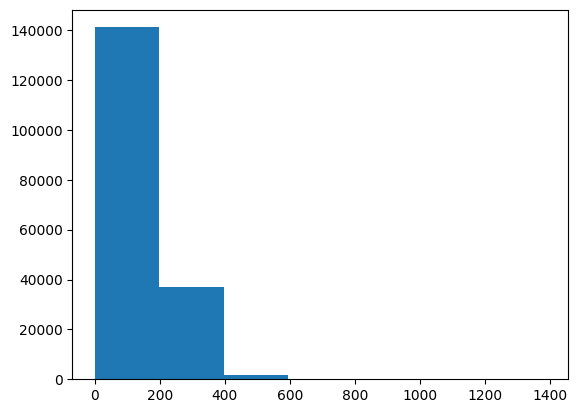

In [ ]:
import matplotlib.pyplot as plt

plt.hist(char_lens, bins = 7)

In [ ]:
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [ ]:
import string
alphabet = 'letters: ' + string.ascii_lowercase + ' ' + 'digits: '+  string.digits + ' ' + 'punctutations: '+ string.punctuation
alphabet

'letters: abcdefghijklmnopqrstuvwxyz digits: 0123456789 punctutations: !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from keras.layers import TextVectorization

In [ ]:
NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,                       #boyuk herfle yaziriq ki bunu deyisme sonrasinda
                                    output_sequence_length = output_seq_char_len,
                                    name = 'char_vectorizer')

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()

char_vocab, len(char_vocab)

(['',
  '[UNK]',
  np.str_('e'),
  np.str_('t'),
  np.str_('i'),
  np.str_('a'),
  np.str_('n'),
  np.str_('o'),
  np.str_('r'),
  np.str_('s'),
  np.str_('d'),
  np.str_('c'),
  np.str_('l'),
  np.str_('h'),
  np.str_('p'),
  np.str_('m'),
  np.str_('u'),
  np.str_('f'),
  np.str_('g'),
  np.str_('y'),
  np.str_('w'),
  np.str_('v'),
  np.str_('b'),
  np.str_('k'),
  np.str_('x'),
  np.str_('z'),
  np.str_('q'),
  np.str_('j')],
 28)

In [ ]:
random_train_chars = random.choice(train_chars)
char_vectorizer([random_train_chars])

<tf.Tensor: shape=(1, 290), dtype=int64, numpy=
array([[ 3,  7, 11,  7, 15, 14,  5,  8,  2,  3, 13,  2,  3, 13,  2,  8,
         5, 14,  2, 16,  3,  4, 11, 10,  4, 17, 17,  2,  8,  2,  6, 11,
         2,  9,  5, 15,  7,  6, 18,  9, 11,  5, 12, 14,  5, 11, 16, 14,
        16,  6, 11,  3, 16,  8,  2, 11,  7, 15, 22,  4,  6,  2, 10, 20,
         4,  3, 13,  5, 16,  8,  4, 11, 16, 12,  5,  8, 14,  7,  4,  6,
         3,  9,  3,  4, 11, 23,  4,  6, 18, 22,  7, 10, 19,  5, 11, 16,
        14, 16,  6, 11,  3, 16,  8,  2,  5,  6, 10, 20,  2,  9,  3,  2,
         8,  6, 15,  2, 10,  4, 11,  5,  3,  4,  7,  6, 17,  7,  8,  3,
         8,  2,  5,  3, 15,  2,  6,  3,  7, 17, 21,  5,  9, 11, 16, 12,
         5,  8, 10,  2, 15,  2,  6,  3,  4,  5, 21, 10,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 

In [ ]:
char_embed = layers.Embedding(
    input_dim = len(char_vocab),
    output_dim = 25,
    mask_zero = True,
    name = 'char_embed'
)

In [ ]:
inputs = layers.Input(shape = (1, ), dtype = tf.string)

x = char_vectorizer(inputs)
x = char_embed(x)

x = layers.Conv1D(64, kernel_size = 10, padding = 'same', activation = 'relu')(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(x)
x = layers.Conv1D(16, kernel_size = 10, padding = 'same', activation = 'relu')(x)
x = layers.GlobalMaxPool1D()(x)

outputs = layers.Dense(num_classes, activation = 'softmax')(x)
model_3 = tf.keras.models.Model(inputs, outputs, name = 'model_3_conv1d_char_embedding')

model_3.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
model_3.summary()

Model: "model_3_conv1d_char_embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ char_vectorizer                 │ (None, 290)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ char_embed (Embedding)          │ (None, 290, 25)        │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 290, 64)        │        16,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 290, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 290, 64)        │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 290, 16)        │        10,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 16)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,369 (524.88 KB)

 Trainable params: 134,369 (524.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch = int(0.1 * len(train_char_dataset)),
                              epochs = 3,
                              validation_data = val_char_dataset,
                              validation_steps = int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 376s 652ms/step - accuracy: 0.3614 - loss: 1.4372 - val_accuracy: 0.4970 - val_loss: 1.2000
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 382s 680ms/step - accuracy: 0.5387 - loss: 1.1454 - val_accuracy: 0.6011 - val_loss: 0.9581
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 382s 681ms/step - accuracy: 0.6050 - loss: 0.9855 - val_accuracy: 0.6380 - val_loss: 0.8843


In [ ]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 ━━━━━━━━━━━━━━━━━━━━ 141s 149ms/step


array([[0.3019159 , 0.3262118 , 0.0702473 , 0.25815615, 0.04346882],
       [0.33697057, 0.31377053, 0.07277666, 0.19696878, 0.07951339],
       [0.25945935, 0.21384552, 0.0846004 , 0.3823336 , 0.05976101],
       ...,
       [0.00463304, 0.05639865, 0.05017997, 0.00483344, 0.8839549 ],
       [0.06175631, 0.44323525, 0.079703  , 0.0752852 , 0.34002024],
       [0.31421557, 0.3869293 , 0.06487799, 0.1868143 , 0.0471628 ]],
      dtype=float32)

In [ ]:
model_3_preds = tf.argmax(model_3_pred_probs, axis = 1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 0, 3, ..., 4, 1, 1])>

In [ ]:
model_3_results = calculate_results(y_true = val_labes_encoded,
                                    y_pred = model_3_preds)
model_3_results

{'accuracy': 64.75572620150933,
 'precision': 0.646314672803086,
 'recall': 0.6475572620150933,
 'f1': 0.6448148074090632}

In [ ]:
#Token level embedding
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_hub as hub

# Wrap the TensorFlow Hub layer in a Lambda layer to convert the KerasTensor to a TensorFlow tensor.
token_inputs = layers.Input(shape=[], dtype=tf.string, name='token_input')
token_embedding = layers.Lambda(lambda x: sentence_encoder_layer(tf.cast(x, tf.string)))(token_inputs)
token_outputs = layers.Dense(128, activation='relu')(token_embedding)
token_model = tf.keras.models.Model(token_inputs, token_outputs)

#Character level embedding
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name='char_input')
char_vectors = char_vectorizer(char_inputs)
char_embedding = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embedding)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

#Concatenate these two outputs
token_char_concat = layers.Concatenate(name='token_char_hybrid')([token_model.output, char_model.output])

#Output layers
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation='relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation='softmax')(final_dropout)

#Construct model with two inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input], # Pass both inputs here
                         outputs=output_layer,
                         name='model_4_token_and_char_embedding')

In [ ]:
model_4.summary()

Model: "model_4_token_and_char_embedding"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ char_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_input         │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ char_vectorizer     │ (None, 290)       │          0 │ char_input[0][0]  │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 512)       │          0 │ token_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ char_embed          │ (None, 290, 25)   │        700 │ char_vectorizer[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_2         │ (None, 290)       │          0 │ char_vectorizer[… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     65,664 │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 48)        │      9,600 │ char_embed[1][0], │
│ (Bidirectional)     │                   │            │ not_equal_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_char_hybrid   │ (None, 176)       │          0 │ dense_4[0][0],    │
│ (Concatenate)       │                   │            │ bidirectional_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 176)       │          0 │ token_char_hybri… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     22,656 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 5)         │        645 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 99,265 (387.75 KB)

 Trainable params: 99,265 (387.75 KB)

 Non-trainable params: 0 (0.00 B)

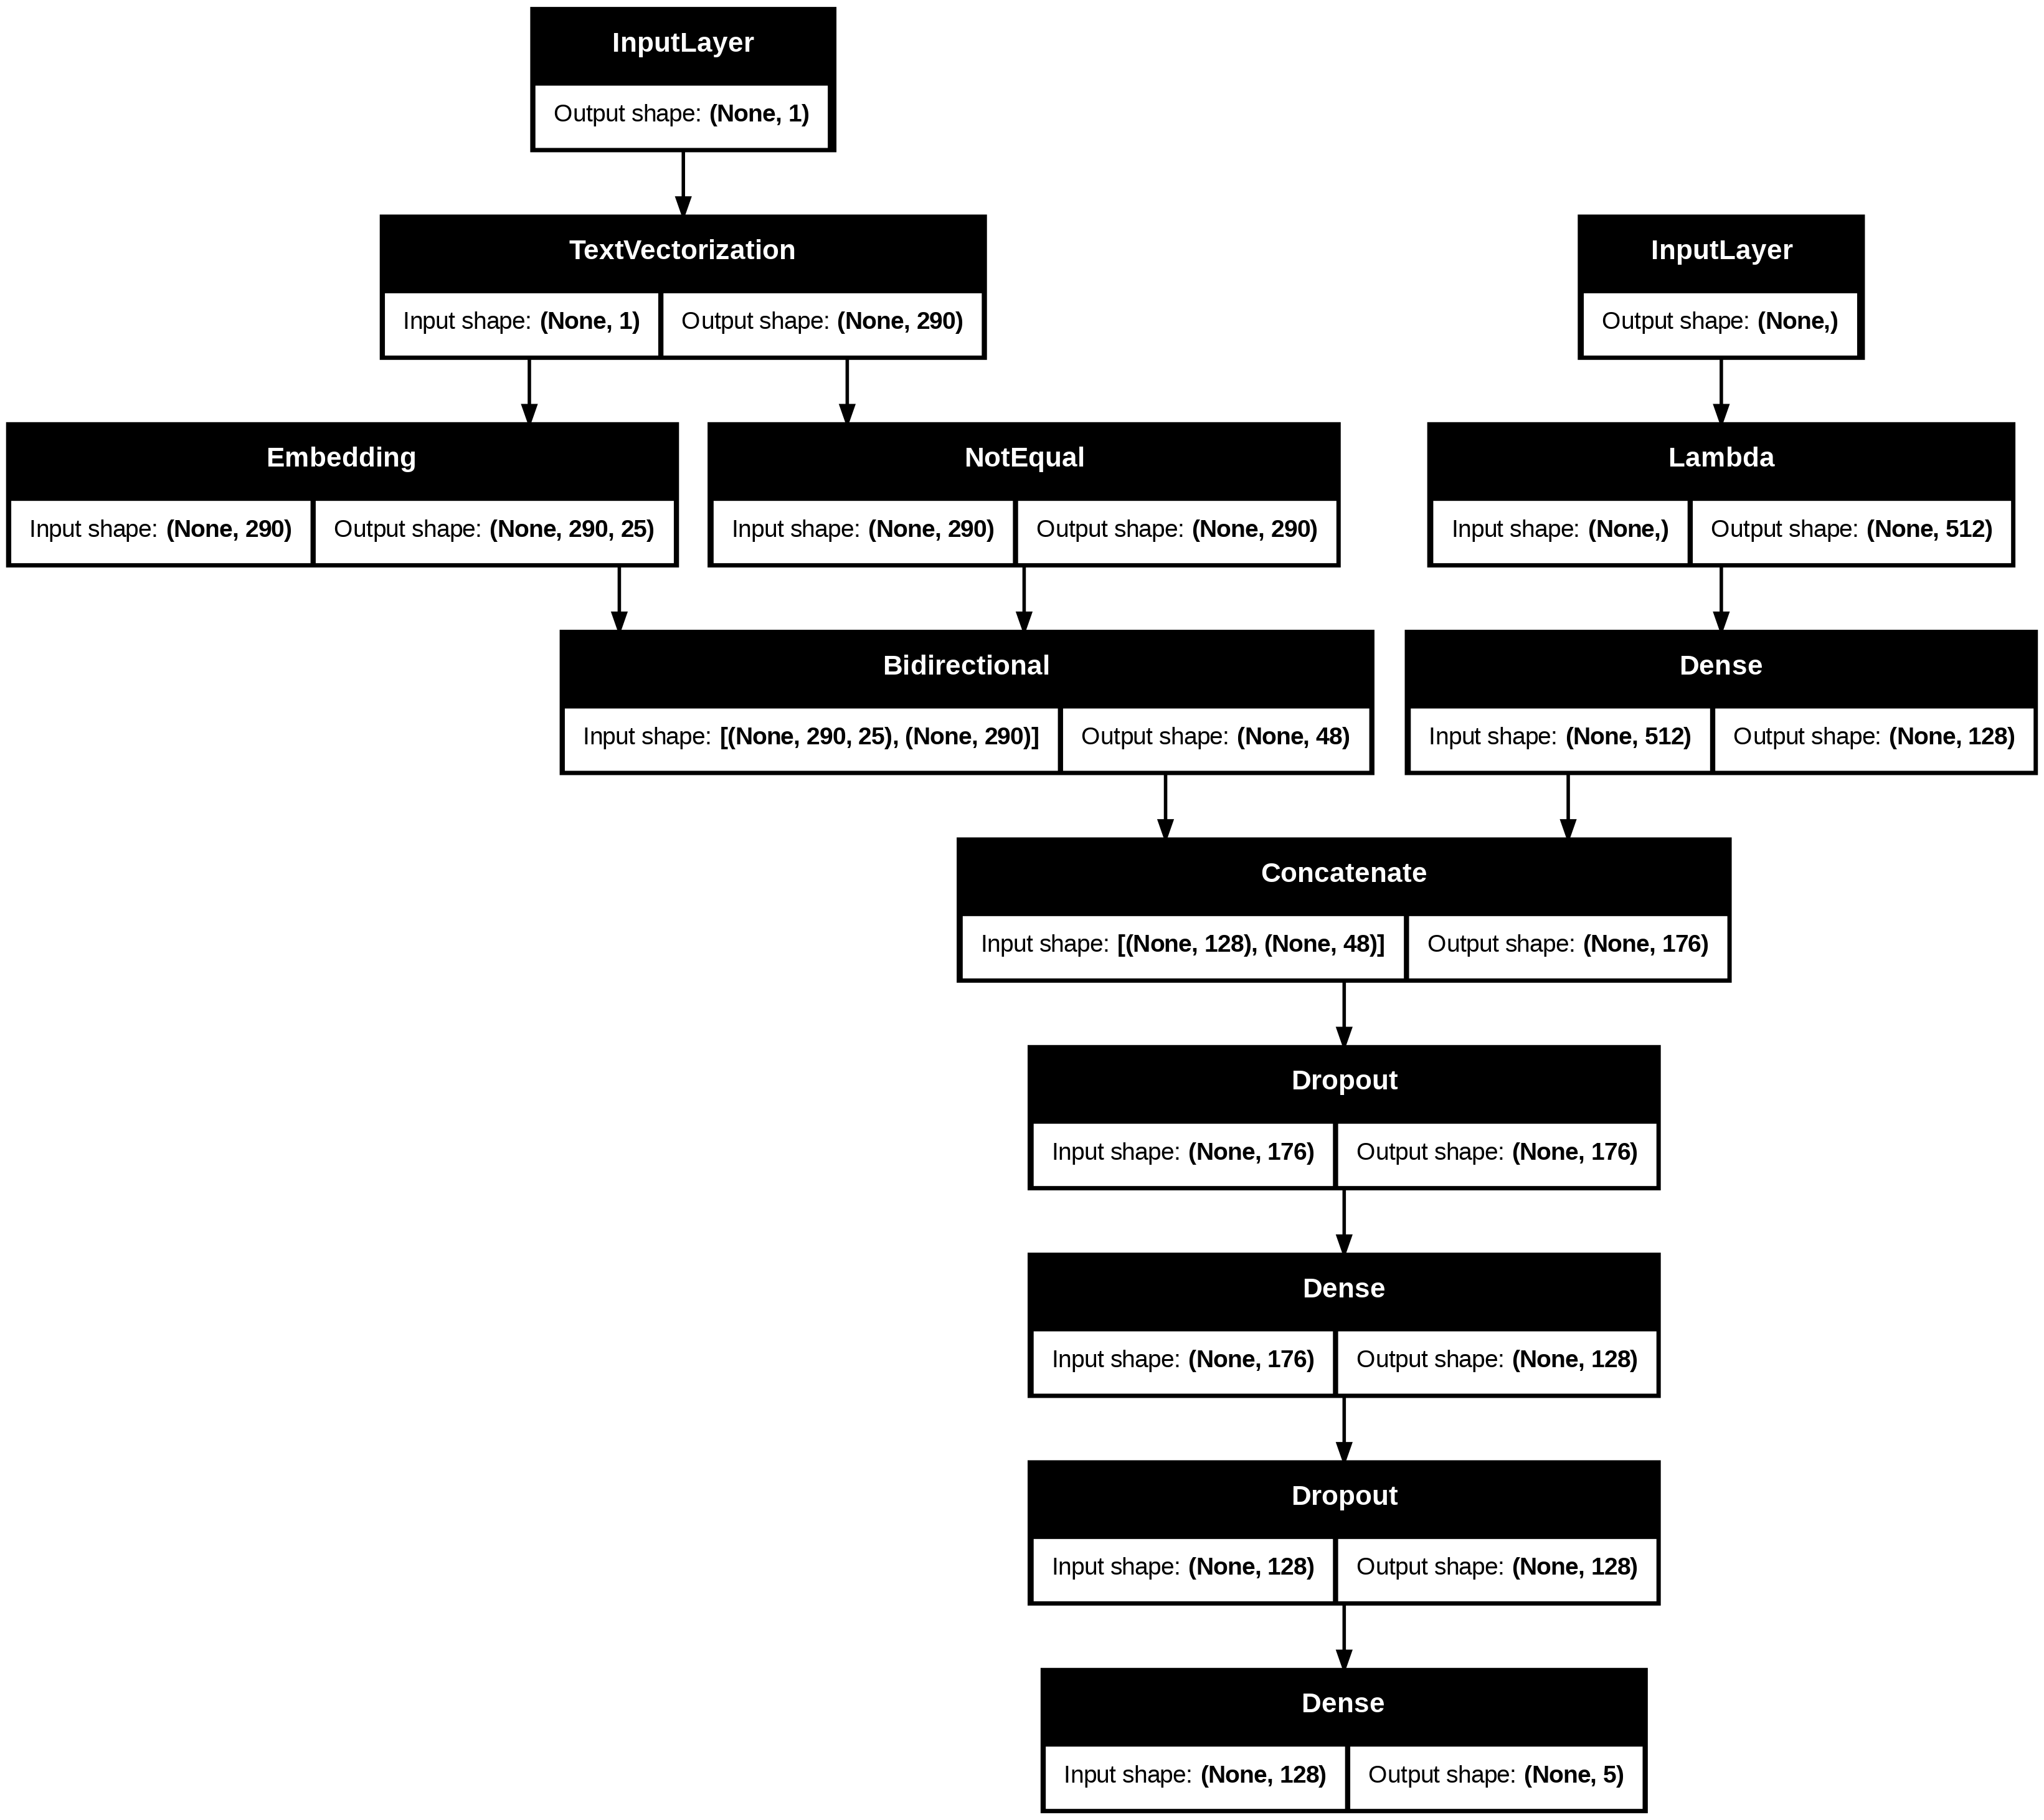

In [ ]:
from keras.utils import plot_model
plot_model(model_4, show_shapes = True)

In [ ]:
model_4.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# model_4_history = model_4.fit([train_char_dataset, train_dataset],
#                               steps_per_epoch = int(0.1 * len(train_char_dataset)),
#                               epochs = 3,
#                               validation_data = [val_char_dataset, val_dataset],
#                               validation_steps = int(0.1 * len(val_char_dataset)))

#Multi-input model

**In other words Multi-Model Deep Learning FrameWork - WIDeText**

In [ ]:
train_char_tokens_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_tokens_labels = tf.data.Dataset.from_tensor_slices((train_labels_one_hot))
train_char_tokens_dataset = tf.data.Dataset.zip((train_char_tokens_data, train_char_tokens_labels))

train_char_tokens_dataset = train_char_tokens_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_char_tokens_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_tokens_labels = tf.data.Dataset.from_tensor_slices((val_labels_one_hot))
val_char_tokens_dataset = tf.data.Dataset.zip((val_char_tokens_data, val_char_tokens_labels))

val_char_tokens_dataset = val_char_tokens_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_char_tokens_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_tokens_labels = tf.data.Dataset.from_tensor_slices((test_labels_one_hot))
test_char_tokens_dataset = tf.data.Dataset.zip((test_char_tokens_data, test_char_tokens_labels))

test_char_tokens_dataset = test_char_tokens_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_4_history = model_4.fit(train_char_tokens_dataset,
                              steps_per_epoch = int(0.1 * len(train_char_tokens_dataset)),
                              epochs = 3,
                              validation_data = val_char_tokens_dataset,
                              validation_steps = int(0.1 * len(val_char_tokens_dataset)))

Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 200s 340ms/step - accuracy: 0.5218 - loss: 1.1644 - val_accuracy: 0.6958 - val_loss: 0.7794
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 188s 334ms/step - accuracy: 0.6900 - loss: 0.8044 - val_accuracy: 0.7271 - val_loss: 0.7217
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 203s 362ms/step - accuracy: 0.7070 - loss: 0.7827 - val_accuracy: 0.7380 - val_loss: 0.6977


In [ ]:
model_4.evaluate(val_char_tokens_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.7343 - loss: 0.6989


[0.6985312104225159, 0.735568642616272]

In [ ]:
model_4_pred_probs = model_4.predict(val_char_tokens_dataset)
model_4_preds = tf.argmax(model_4_pred_probs, axis = 1)
model_4_preds

945/945 ━━━━━━━━━━━━━━━━━━━━ 66s 68ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

In [ ]:
model_4_results = calculate_results(y_true = val_labes_encoded,
                                    y_pred = model_4_preds)

In [ ]:
train_df['line_number'].value_counts()

,count
line_number,
0,15000
1,15000
2,15000
3,15000
4,14992
5,14949
6,14758
7,14279
8,13346


In [ ]:
np.percentile(train_df.line_number, 95)

np.float64(13.0)

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_df['line_number'].to_numpy(),depth = 15)
val_line_numbers_one_hot = tf.one_hot(val_df['line_number'].to_numpy(), depth = 15)
val_line_numbers_one_hot = tf.one_hot(test_df['line_number'].to_numpy(), depth = 15)

train_line_numbers_one_hot

<tf.Tensor: shape=(180040, 15), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
train_df.total_lines.value_counts()

,count
total_lines,
11,24468
10,23639
12,22113
9,19400
13,18438
14,14610
8,12285
15,10768
7,7464
